<a href="https://colab.research.google.com/github/Christyjain89/Projects/blob/main/Data_analysis_with_python_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#!pip install -U scikit-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [9]:
!pip install seaborn

In [11]:
!pip install requests # Install the requests library if you haven't already.

import requests

def download(url, filename):
    """
    Downloads a file from a URL and saves it to a local file.

    Args:
        url (str): The URL of the file to download.
        filename (str): The local filename to save the file to.
    """
    response = requests.get(url)  # Use requests.get instead of pyfetch
    if response.status_code == 200: # Check if the request was successful
        with open(filename, "wb") as f:
            f.write(response.content) # Write the content of the response to the file


In [12]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [14]:
import requests

def download(url, filename):
    """
    Downloads a file from a URL and saves it to a local file.

    Args:
        url (str): The URL of the file to download.
        filename (str): The local filename to save the file to.
    """
    response = requests.get(url)  # Use requests.get instead of pyfetch
    if response.status_code == 200: # Check if the request was successful
        with open(filename, "wb") as f:
            f.write(response.content) # Write the content of the response to the file

# Remove 'await'
download(filepath, "housing.csv")
file_name="housing.csv"


In [15]:
df = pd.read_csv(file_name)

In [16]:
#filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
#df = pd.read_csv(filepath, header=None)

In [17]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [20]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [21]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [22]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [23]:
# prompt: Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame.

import pandas as pd
import numpy as np

# Assuming df is already loaded as in the provided code
# ... (previous code)

floors_counts = df['floors'].value_counts().to_frame()
floors_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


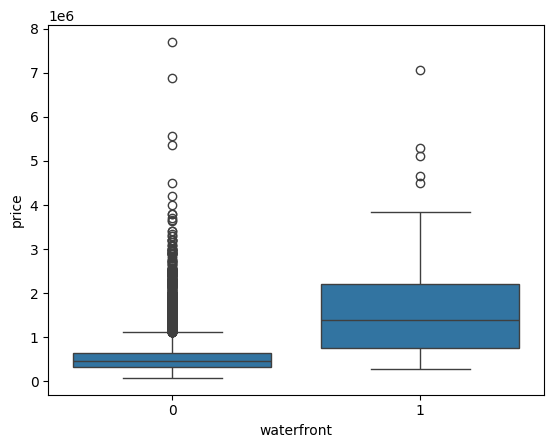

In [24]:
# prompt: Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="waterfront", y="price", data=df)
plt.show()

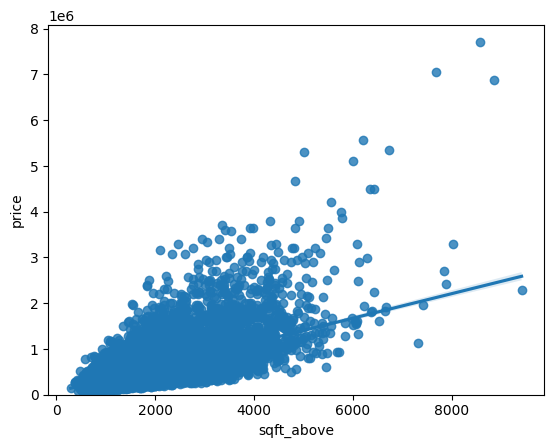

In [25]:
# prompt: Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)
plt.show()


In [27]:
import pandas as pd

# Assuming 'date' is the column name containing '20141013T000000'
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Now you can calculate the correlation
df.corr()['price'].sort_values()

,price
zipcode,-0.053203
id,-0.016762
date,-0.004357
long,0.021626
Unnamed: 0,0.027372
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434


In [28]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [29]:
# prompt: Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R square

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming df is already loaded as in the provided code
# ... (previous code)

# Fit the linear regression model
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)

# Calculate R-squared
r_squared = lm.score(X, Y)
print("R-squared:", r_squared)

R-squared: 0.4928532179037931


In [30]:
# prompt: Fit a linear regression model to predict the 'price' using the list of features:

# Create and fit the linear regression model
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)

# You can now use lm to make predictions
# For example:
# predictions = lm.predict(X)

# Print the R-squared value
print("R-squared:", lm.score(X,Y))

R-squared: 0.699751387375898


In [32]:
# prompt: Create a list of tuples, the first element in the tuple contains the name of the estimator:
# 'scale'
# 'polynomial'
# 'model'
# The second element in the tuple contains the model constructor
# StandardScaler()
# PolynomialFeatures(include_bias=False)
# LinearRegression()

import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [33]:
# prompt: Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R square

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming 'df' and 'features' are already defined as in your provided code
# ... (previous code)

# Create the pipeline object
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)

# Fit the pipeline using the features in the list
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = df[features]
Y = df['price']
pipe.fit(X,Y)

# Calculate and print the R-squared value
r_squared = pipe.score(X,Y)
print("R-squared:", r_squared)

R-squared: 0.8295393519943828


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [35]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [36]:
from sklearn.linear_model import Ridge

In [37]:
# prompt: Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R square using the test data

from sklearn.linear_model import Ridge

# Create a Ridge regression object with regularization parameter alpha = 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model to the training data
ridge_model.fit(x_train, y_train)

# Calculate the R-squared score on the test data
r_squared = ridge_model.score(x_test, y_test)
print("R-squared (Ridge Regression):", r_squared)

R-squared (Ridge Regression): 0.6478759163939112


In [38]:
# prompt: Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R square utilising the test data provided.

from sklearn.preprocessing import PolynomialFeatures

# Assuming x_train and x_test are already defined as in your provided code
# ... (previous code)

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Fit and transform the training data
x_train_poly = poly.fit_transform(x_train)

# Transform the testing data (using the same poly object fitted on training data)
x_test_poly = poly.transform(x_test)

# Create and fit a Ridge regression object
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_poly, y_train)

# Calculate the R-squared score using the transformed test data
r_squared = ridge_model.score(x_test_poly, y_test)
print("R-squared (Ridge Regression with Polynomial Features):", r_squared)

R-squared (Ridge Regression with Polynomial Features): 0.7002744267906067
